# CSE 351 - Data Science Project
## What Makes People in a Country Happy?
### By Felix Zhu, Kevin Chen, Tommy Lin

## Importing Libraries and Files

In [1]:
import pandas as pd

# Import our datasets
data2015 = pd.read_csv('world_happiness/2015.csv')
data2016 = pd.read_csv('world_happiness/2016.csv')
data2017 = pd.read_csv('world_happiness/2017.csv')
data2018 = pd.read_csv('world_happiness/2018.csv')
data2019 = pd.read_csv('world_happiness/2019.csv')

## Cleaning Data

In [2]:
full_data = {'2015':data2015, '2016':data2016, '2017':data2017, '2018':data2018, '2019':data2019}

# Country
full_data['2018'].rename(columns = {'Country or region': 'Country'}, inplace = True)
full_data['2019'].rename(columns = {'Country or region': 'Country'}, inplace = True)

# Happiness Rank
full_data['2017'].rename(columns = {'Happiness.Rank': 'Happiness Rank'}, inplace = True)
full_data['2018'].rename(columns = {'Overall rank': 'Happiness Rank'}, inplace = True)
full_data['2019'].rename(columns = {'Overall rank': 'Happiness Rank'}, inplace = True)

# Happiness Score
full_data['2017'].rename(columns = {'Happiness.Score': 'Happiness Score'}, inplace = True)
full_data['2018'].rename(columns = {'Score': 'Happiness Score'}, inplace = True)
full_data['2019'].rename(columns = {'Score': 'Happiness Score'}, inplace = True)

# Economy
full_data['2015'].rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita'}, inplace = True)
full_data['2016'].rename(columns = {'Economy (GDP per Capita)': 'GDP per Capita'}, inplace = True)
full_data['2017'].rename(columns = {'Economy..GDP.per.Capita.': 'GDP per Capita'}, inplace = True)
full_data['2018'].rename(columns = {'GDP per capita': 'GDP per Capita'}, inplace = True)
full_data['2019'].rename(columns = {'GDP per capita': 'GDP per Capita'}, inplace = True)

# Freedom
full_data['2018'].rename(columns = {'Freedom to make life choices': 'Freedom'}, inplace = True)
full_data['2019'].rename(columns = {'Freedom to make life choices': 'Freedom'}, inplace = True)

# Perceptions of Corruption
full_data['2015'].rename(columns = {'Trust (Government Corruption)': 'Trust'}, inplace = True)
full_data['2016'].rename(columns = {'Trust (Government Corruption)': 'Trust'}, inplace = True)
full_data['2017'].rename(columns = {'Trust..Government.Corruption.': 'Trust'}, inplace = True)
full_data['2018'].rename(columns = {'Perceptions of corruption': 'Trust'}, inplace = True)
full_data['2019'].rename(columns = {'Perceptions of corruption': 'Trust'}, inplace = True)

# Family or Social Support
full_data['2015'].rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
full_data['2016'].rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
full_data['2017'].rename(columns = {'Family': 'Family or Social Support'}, inplace = True)
full_data['2018'].rename(columns = {'Social support': 'Family or Social Support'}, inplace = True)
full_data['2019'].rename(columns = {'Social support': 'Family or Social Support'}, inplace = True)

# Life Expectancy
full_data['2015'].rename(columns = {'Health (Life Expectancy)': 'Life Expectancy'}, inplace = True)
full_data['2016'].rename(columns = {'Health (Life Expectancy)': 'Life Expectancy'}, inplace = True)
full_data['2017'].rename(columns = {'Health..Life.Expectancy.': 'Life Expectancy'}, inplace = True)
full_data['2018'].rename(columns = {'Healthy life expectancy': 'Life Expectancy'}, inplace = True)
full_data['2019'].rename(columns = {'Healthy life expectancy': 'Life Expectancy'}, inplace = True)

# Dystopia Residual
full_data['2017'].rename(columns = {'Dystopia.Residual': 'Dystopia Residual'}, inplace = True)
full_data['2018']["Dystopia Residual"] = full_data['2018']["Happiness Score"] - full_data['2018']["GDP per Capita"] - full_data['2018']["Family or Social Support"] - full_data['2018']["Life Expectancy"] - full_data['2018']["Freedom"] - full_data['2018']["Generosity"] - full_data['2018']["Trust"]
full_data['2019']["Dystopia Residual"] = full_data['2019']["Happiness Score"] - full_data['2019']["GDP per Capita"] - full_data['2019']["Family or Social Support"] - full_data['2019']["Life Expectancy"] - full_data['2019']["Freedom"] - full_data['2019']["Generosity"] - full_data['2019']["Trust"]

# Drop columns that we do not need
full_data['2015'].drop('Standard Error', inplace = True, axis = 1)
full_data['2015'].drop('Region', inplace = True, axis = 1)
full_data['2016'].drop('Region', inplace = True, axis = 1)
full_data['2016'].drop('Lower Confidence Interval', inplace = True, axis = 1)
full_data['2016'].drop('Upper Confidence Interval', inplace = True, axis = 1)
full_data['2017'].drop('Whisker.high', inplace = True, axis = 1)
full_data['2017'].drop('Whisker.low', inplace = True, axis = 1)


In [3]:
full_data['2015'].head()

,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# full_data['2016'].head()

,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Trust,Generosity,Dystopia Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
# full_data['2017'].head()

,Country,Happiness Rank,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Generosity,Trust,Dystopia Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
# full_data['2018'].head()

,Happiness Rank,Country,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Generosity,Trust,Dystopia Residual
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318


In [7]:
# full_data['2019'].head()

,Happiness Rank,Country,Happiness Score,GDP per Capita,Family or Social Support,Life Expectancy,Freedom,Generosity,Trust,Dystopia Residual
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394


In [8]:
# full_data['2019'].shape

(156, 10)

In [9]:
# full_data['2019'].isnull().sum()

Happiness Rank              0
Country                     0
Happiness Score             0
GDP per Capita              0
Family or Social Support    0
Life Expectancy             0
Freedom                     0
Generosity                  0
Trust                       0
Dystopia Residual           0
dtype: int64

## EDA

### What are the central tendencies of happiness score over the years? Did they increase or decrease?

In [10]:
#Create a list to be merged later
df_list = [data2015, data2016,data2017, data2018,data2019]

#Add a column to each df base on their year
for i, df in enumerate(df_list):
    year = 2015 + i
    df_list[i] = df.assign(Year=year)

#Merge the df
merged_df = pd.concat(df_list, ignore_index=True)

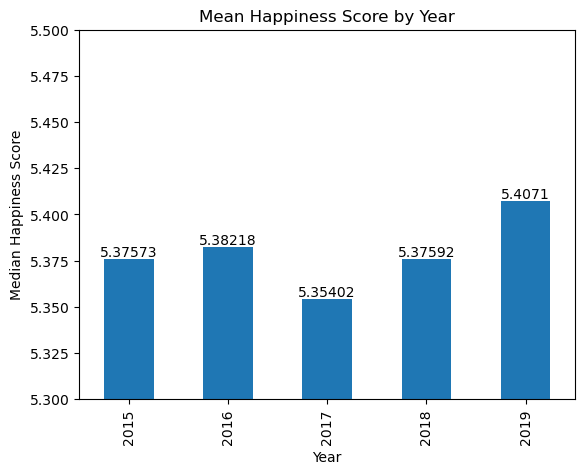

In [11]:
#Graph the mean of each year
mean = merged_df[['Year', 'Happiness Score']]
mean.set_index("Year", inplace=True)  # Set the index to "Year"
mean = mean.groupby("Year")['Happiness Score'].mean().to_frame()
ax = mean.plot(kind ='bar', title='Mean Happiness Score by Year', xlabel='Year', ylabel='Median Happiness Score', legend=False)

ax.set_ylim([5.3, 5.5])
#Label each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

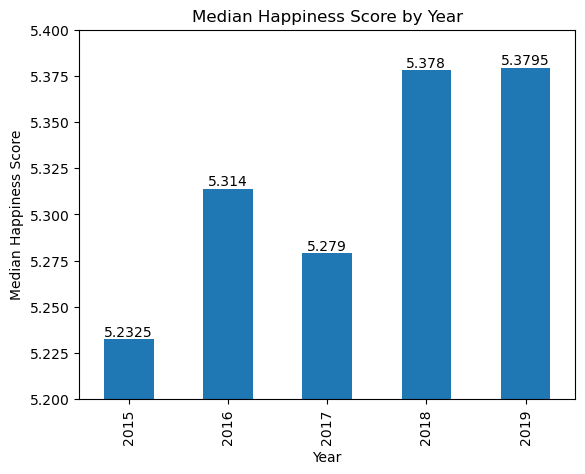

In [12]:
#Graph the median of each year
median = merged_df[['Year', 'Happiness Score']]
median.set_index("Year", inplace=True)  # Set the index to "Year"
median = median.groupby("Year")['Happiness Score'].median().to_frame()
ax = median.plot(kind ='bar', title='Median Happiness Score by Year', xlabel='Year', ylabel='Median Happiness Score', legend=False)

ax.set_ylim([5.2, 5.4])
#Label each bar
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

In [14]:
for year in df_list:
    df = year
    print(df['Year'][0])
    print(df['Happiness Score'].describe())
    print('----------')

2015
count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64
----------
2016
count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: Happiness Score, dtype: float64
----------
2017
count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: Happiness Score, dtype: float64
----------
2018
count    156.000000
mean       5.375917
std        1.119506
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: Happiness Score, dtype: float64
----------
2019
count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500